In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/170.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/234.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/287.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/87.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/167.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/138.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/257.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/163.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/148.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/238.jpg
/kaggle/input/alien-vs-predator-images/al

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt

In [3]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,rotation_range=15,brightness_range=[0.5,1.5],horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train=train_datagen.flow_from_directory(
        directory='/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train',
        class_mode='binary',
        color_mode='rgb',
        target_size=(256,256),
        batch_size=32
)

Found 694 images belonging to 2 classes.


In [5]:
val=val_datagen.flow_from_directory(
        directory='/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/validation',
        class_mode='binary',
        color_mode='rgb',
        target_size=(256,256),
        batch_size=10
)

Found 200 images belonging to 2 classes.


In [6]:
model=Sequential()
model.add(Conv2D(32,3,input_shape=(256,256,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3))
model.add(MaxPool2D(3))
model.add(Conv2D(32,3))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 32)        9

In [8]:
epoch=20
model.compile(optimizer='rmsprop',metrics='accuracy',loss='binary_crossentropy')
hist=model.fit_generator(train,
                        steps_per_epoch=21,
                        validation_data=val,
                        validation_steps=20,
                        epochs=epoch)

Epoch 1/20
21/21 [==============================] - 13s 612ms/step - loss: 0.7202 - accuracy: 0.5317 - val_loss: 0.6166 - val_accuracy: 0.6050
Epoch 2/20
21/21 [==============================] - 11s 543ms/step - loss: 0.6914 - accuracy: 0.5891 - val_loss: 0.6405 - val_accuracy: 0.5900
Epoch 3/20
21/21 [==============================] - 11s 526ms/step - loss: 0.6254 - accuracy: 0.6375 - val_loss: 0.5873 - val_accuracy: 0.7000
Epoch 4/20
21/21 [==============================] - 12s 579ms/step - loss: 0.5989 - accuracy: 0.6918 - val_loss: 0.6044 - val_accuracy: 0.6650
Epoch 5/20
21/21 [==============================] - 11s 529ms/step - loss: 0.5757 - accuracy: 0.7039 - val_loss: 0.5720 - val_accuracy: 0.6800
Epoch 6/20
21/21 [==============================] - 11s 522ms/step - loss: 0.5304 - accuracy: 0.7568 - val_loss: 0.6748 - val_accuracy: 0.6800
Epoch 7/20
21/21 [==============================] - 11s 542ms/step - loss: 0.5296 - accuracy: 0.7583 - val_loss: 0.5503 - val_accuracy: 0.7100

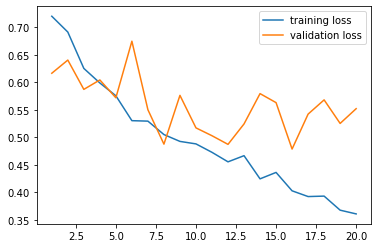

In [9]:
d=hist.history
plt.plot(range(1,epoch+1),d['loss'],label='training loss')
plt.plot(range(1,epoch+1),d['val_loss'],label='validation loss')
plt.legend()

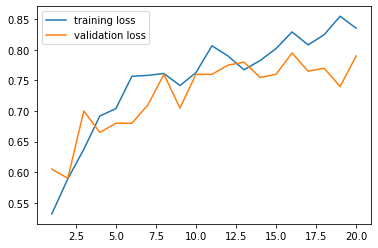

In [10]:
plt.plot(range(1,epoch+1),d['accuracy'],label='training loss')
plt.plot(range(1,epoch+1),d['val_accuracy'],label='validation loss')
plt.legend()

In [11]:
from tensorflow.keras import models

In [12]:
layer_outputs=[layer.output for layer in model.layers[:7]]
model_pred=models.Model(inputs=model.input,outputs=layer_outputs)

In [13]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
loc='/kaggle/input/alien-vs-predator-images/data/validation/alien/30.jpg'
img=load_img(loc,target_size=(256,256))
img=img_to_array(img)
img_tensor=np.expand_dims(img,axis=0)

In [14]:
preds=model_pred.predict(img_tensor)

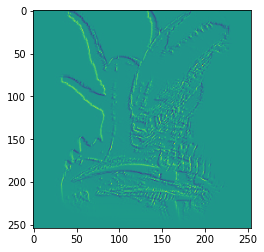

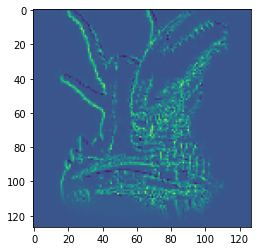

In [15]:
first_layer=preds[0]
plt.imshow(first_layer[0,:,:,31])
plt.show()
plt.imshow(preds[1][0,:,:,31])

In [16]:
model.predict(img_tensor)

array([[3.645519e-38]], dtype=float32)